In [128]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy as sis
import pandas as pd

### **4.1** Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)

In [129]:
def senosoidal_min(Fo):
    Fo=Fo
    Fs=160*2
    Ts=1/Fs
    t=np.arange(0,1,Ts)
    w=2*np.pi*Fo
    x=np.sin(w*t)
    return t,x
def senosoidal_op(Fo):
    Fo=Fo
    Fs=1000
    Ts=1/Fs
    t=np.arange(0,1,Ts)
    w=2*np.pi*Fo
    x=np.sin(w*t)
    return t,x

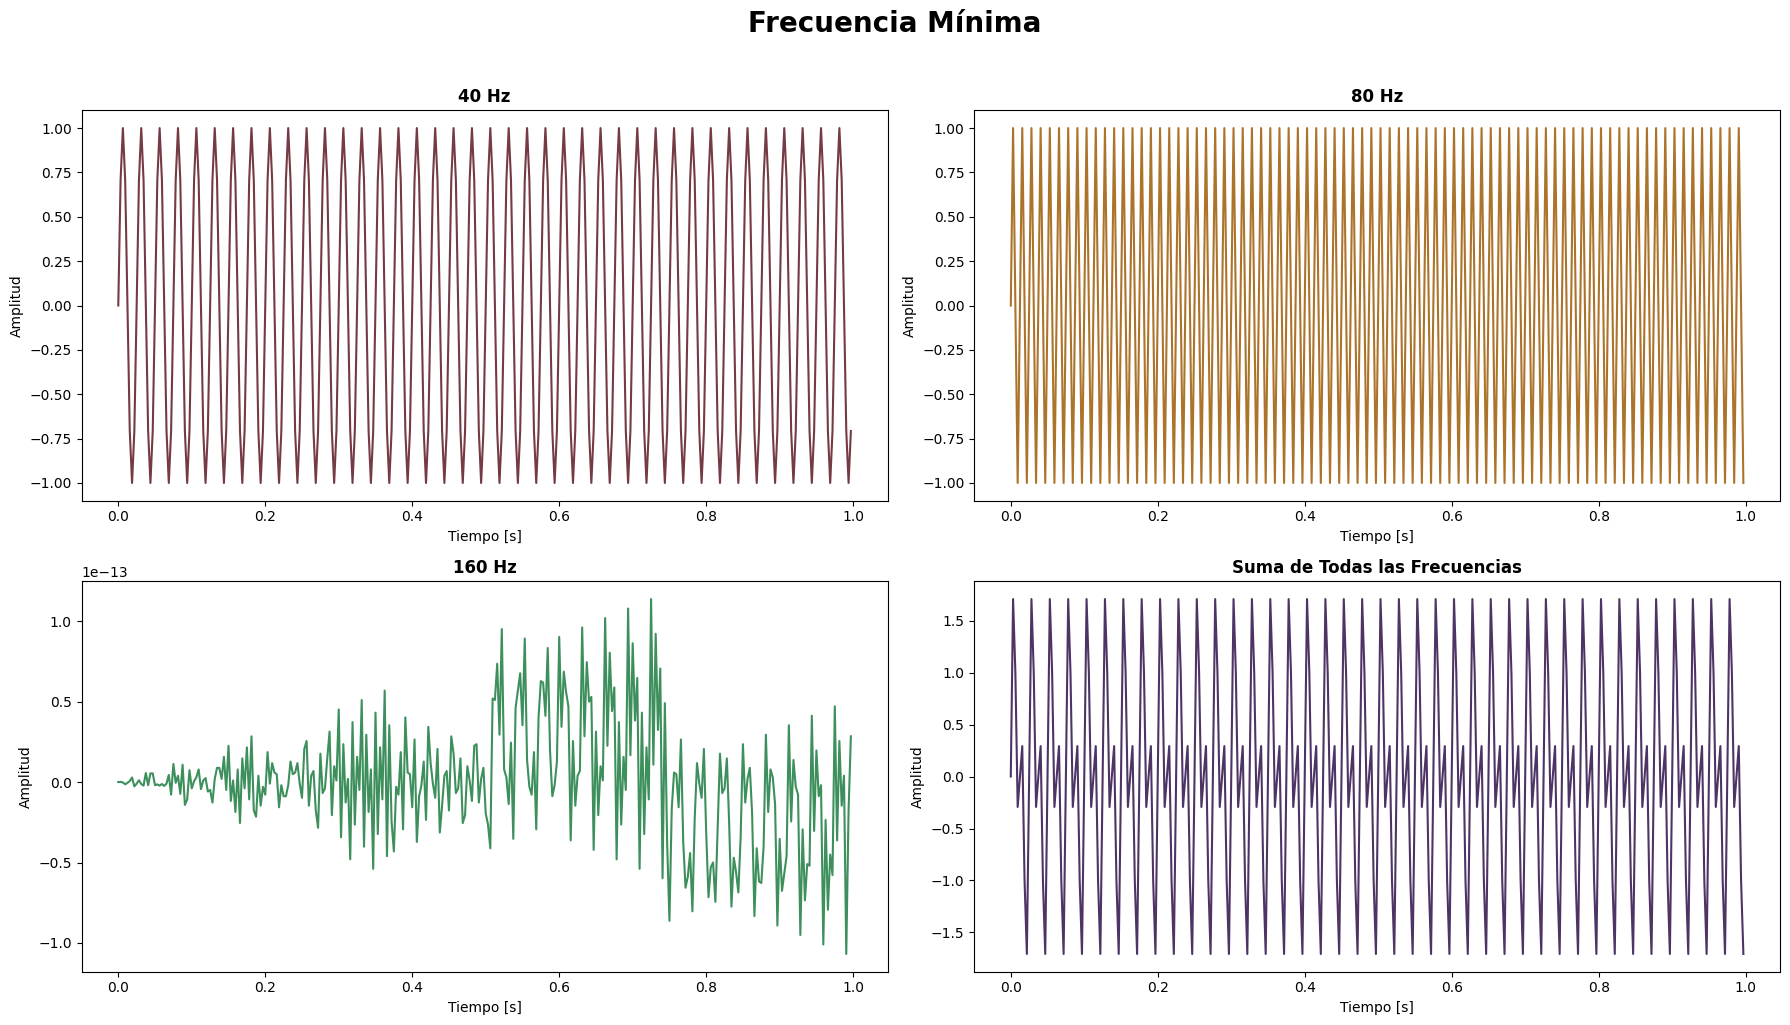

In [130]:
at,ax = senosoidal_min(40)
bt,bx = senosoidal_min(80)
ct,cx = senosoidal_min(160)
graficas = [ax,bx,cx,(ax+bx+cx)]
tiempo = [at,bt,ct,ct]
labels = ['40 Hz','80 Hz','160 Hz','Suma de Todas las Frecuencias']
fig,axs = plt.subplots(2,2,figsize=(18,10))
axs_flat = axs.flatten()
for i in range(4):
    col=np.random.uniform(0,0.7,size=3)
    axs_flat[i].plot(tiempo[i],graficas[i],color=col)
    axs_flat[i].set_title(labels[i],weight='bold')
    axs_flat[i].set_xlabel('Tiempo [s]')
    axs_flat[i].set_ylabel('Amplitud')
fig.suptitle('Frecuencia Mínima',fontsize=20,weight='bold',y=1.02)
plt.tight_layout()
plt.show()

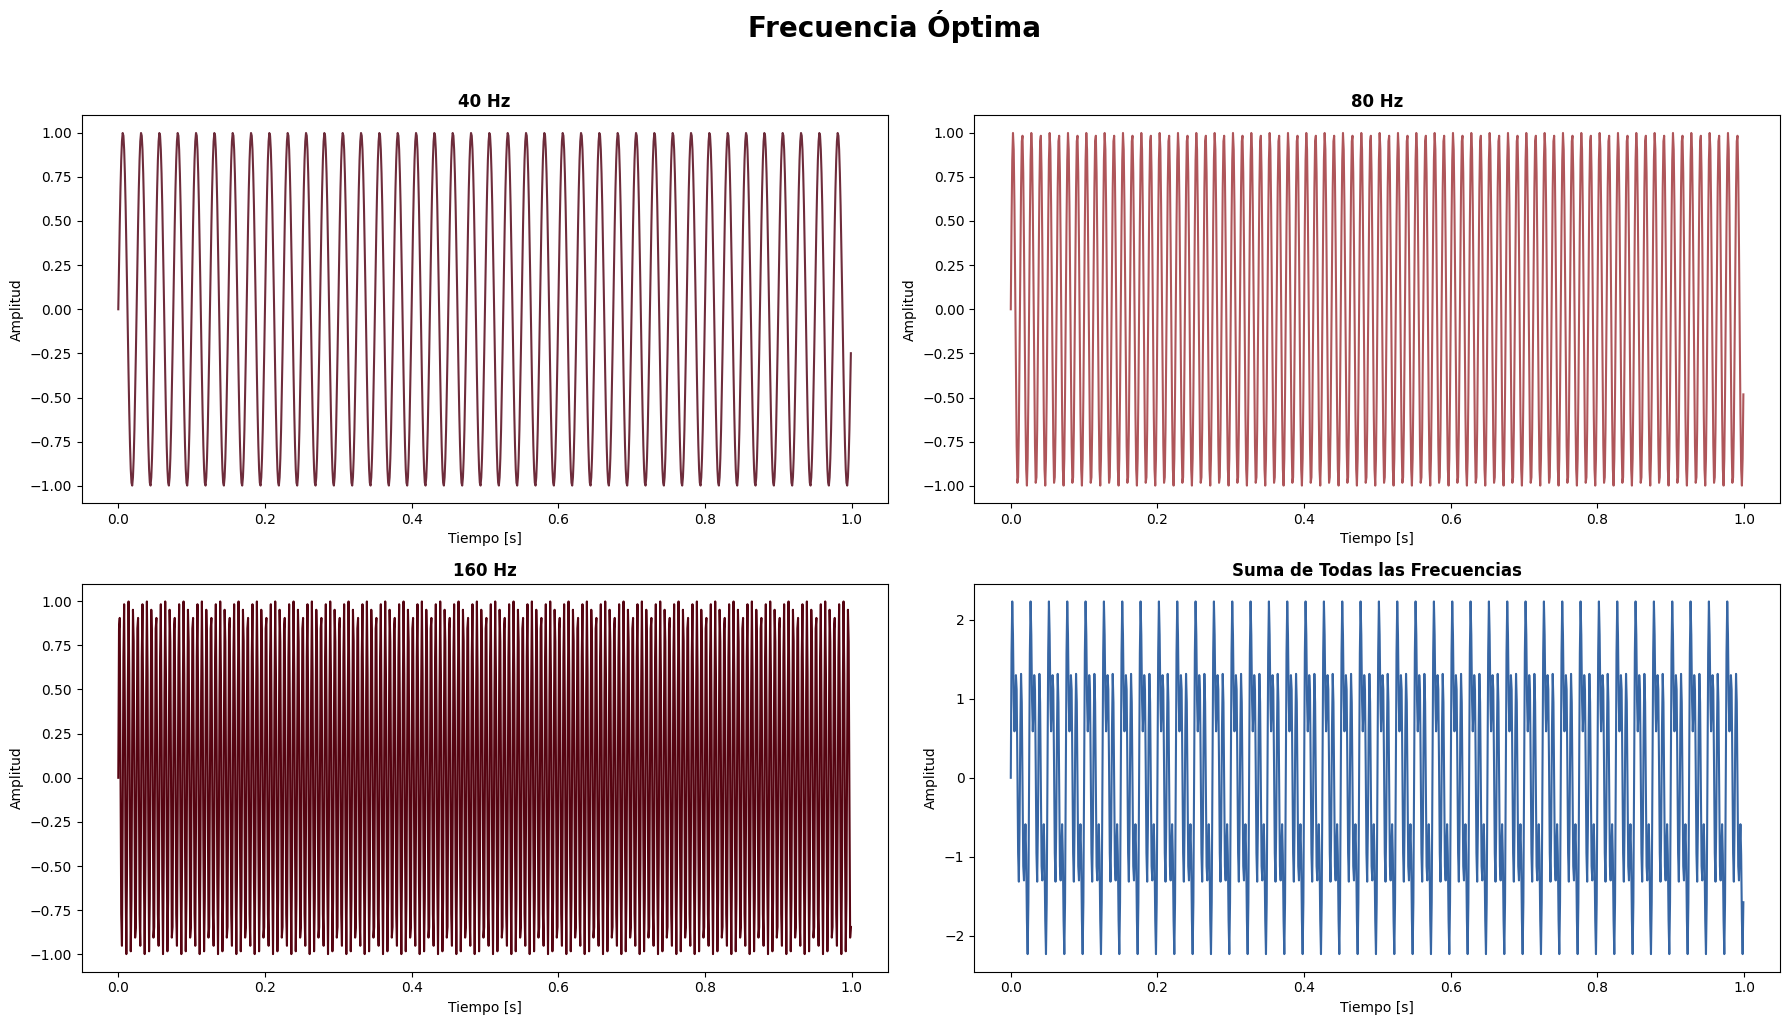

In [131]:
at,ax = senosoidal_op(40)
bt,bx = senosoidal_op(80)
ct,cx = senosoidal_op(160)
graficas = [ax,bx,cx,(ax+bx+cx)]
tiempo = [at,bt,ct,ct]
labels = ['40 Hz','80 Hz','160 Hz','Suma de Todas las Frecuencias']
fig,axs = plt.subplots(2,2,figsize=(18,10))
axs_flat = axs.flatten()
for i in range(4):
    col=np.random.uniform(0,0.7,size=3)
    axs_flat[i].plot(tiempo[i],graficas[i],color=col)
    axs_flat[i].set_title(labels[i],weight='bold')
    axs_flat[i].set_xlabel('Tiempo [s]')
    axs_flat[i].set_ylabel('Amplitud')
fig.suptitle('Frecuencia Óptima',fontsize=20,weight='bold',y=1.02)
plt.tight_layout()
plt.show()

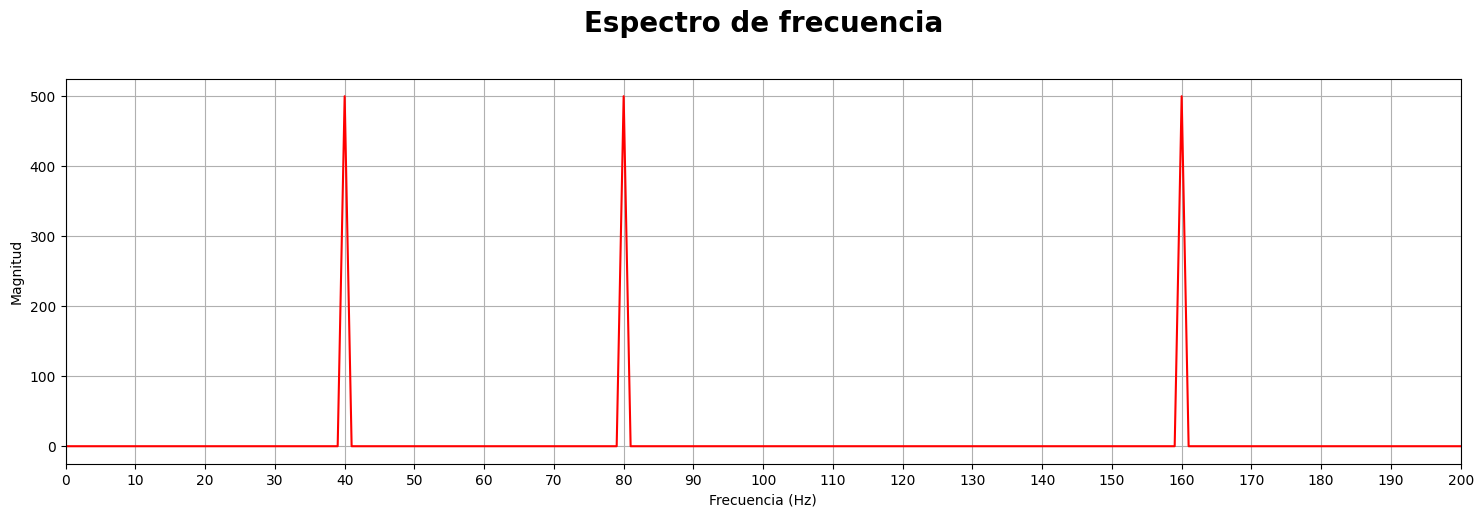

In [132]:
Sumatoria = graficas[3]
FFT_S = np.fft.fft(Sumatoria)
# Cálculo del espectro de frecuencia
N = len(FFT_S)
frequencies = np.fft.fftfreq(N,1/1000)[:N//2]
magnitude = np.abs(FFT_S)[:N//2]
# Graficación del espectro de frecuencia
plt.figure(figsize=(18,5))
plt.plot(frequencies,magnitude,color='r')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de frecuencia',weight='bold',y=1.1,fontsize='20')
plt.xlim([0,200])
plt.xticks(np.arange(0,201,10))
plt.grid(True)
plt.show()

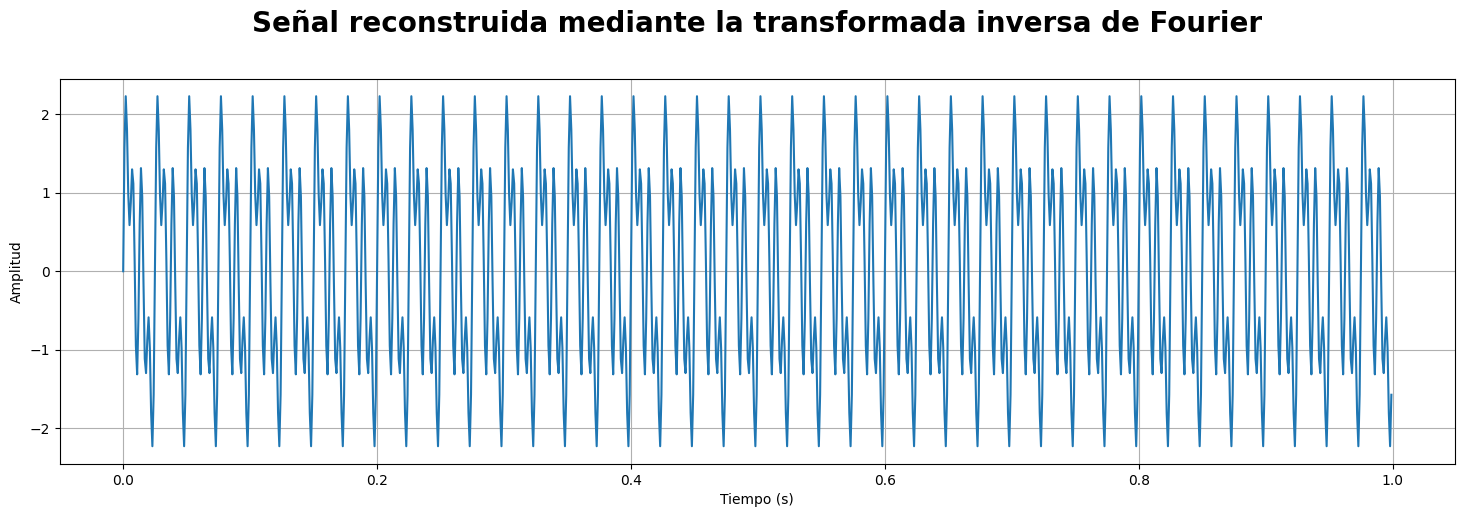

In [133]:
# Transformada inversa de Fourier
FFT_S_inv = np.fft.ifft(FFT_S)

# Graficación de la señal obtenida
plt.figure(figsize=(18,5))
plt.plot(tiempo[2],np.real(FFT_S_inv))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal reconstruida mediante la transformada inversa de Fourier',weight='bold',fontsize='20',y=1.1)
plt.grid(True)
plt.show()

In [134]:
data = sio.loadmat('senecg.mat')
ecg = data['ECG']
ecg = [item for sublist in ecg for item in sublist]

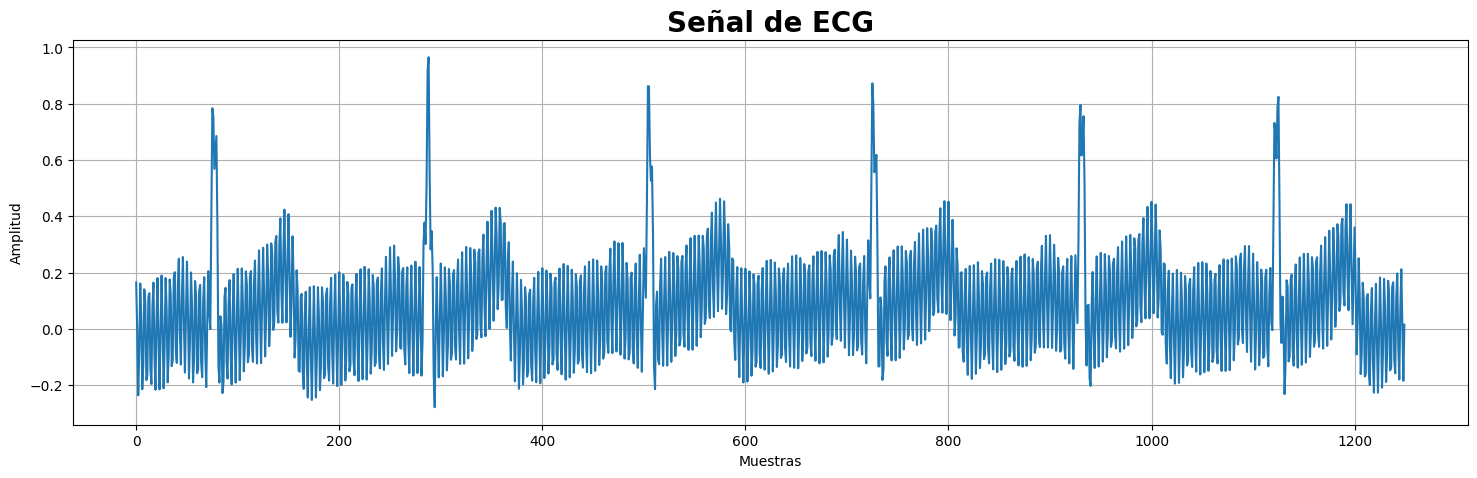

In [135]:
plt.figure(figsize=(18,5))
plt.plot(ecg)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal de ECG',weight='bold',fontsize=20)
plt.grid(True)
plt.show()

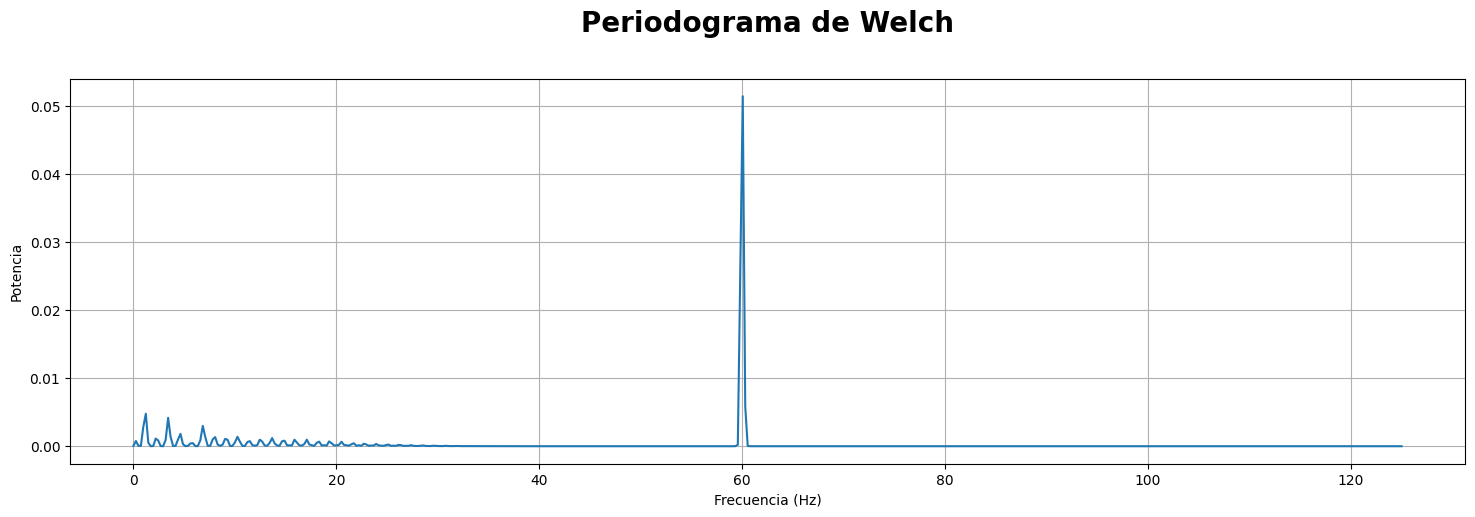

In [136]:
f,Pxx = sis.signal.welch(ecg, fs=250, nperseg=1024)
plt.figure(figsize=(18,5))
plt.plot(f,Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch',weight='bold',fontsize=20,y=1.1)
plt.grid(True)
plt.show()

### **¿Por qué se utilizó la Ventana de Hanning?**
### La ventana de Hanning se utiliza en este caso para minimizar el efecto de las discontinuidades en la señal de ECG que pueden introducir artefactos o distorsiones en el espectro de frecuencia. Además, la ventana de Hanning tiene una buena propiedad de atenuación de lóbulos laterales, lo que ayuda a reducir el leakage (fuga espectral) y mejora la precisión en la estimación de la densidad espectral de potencia.
### **Justificación en el Informe:**
### En tu informe, es importante justificar la elección de la ventana de Hanning. Puedes mencionar que se eligió esta ventana debido a sus propiedades de atenuación de lóbulos laterales y su capacidad para reducir el leakage, lo que resulta en una mejor estimación de la densidad espectral de potencia. Además, puedes mencionar que el tamaño de la ventana y el solapamiento se seleccionaron para obtener un equilibrio entre resolución en frecuencia y suavizado en el periodograma de Welch, considerando las características de la señal de ECG y los objetivos del análisis.
